Main notebook containing relevant diagnostics and important figures for the manuscript. 

It is automatically copied from \_\_main\_\_.ipynb and executed for newly trained ensembles using papermill.

This can also be updated and then triggered again by using the script `execute_ensemble_notebook.py'.

In [5]:
from pathlib import Path
import torch
from torch import nn
from torch.nn import functional as nnf
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from flyvision import results_dir
from flyvision import EnsembleView

import logging

mpl.rcParams["figure.dpi"] = 300

%load_ext autoreload
%autoreload 2

In [6]:
ensemble_name = "flow/9997"  # type: str

In [7]:
validation_subdir = "validation"
loss_file_name = "epe"

In [12]:
ensemble = EnsembleView(ensemble_name, best_checkpoint_fn_kwargs={ "validation_subdir": "validation","loss_file_name": "EPE" })

Loading ensemble:   0%|          | 0/50 [00:00<?, ?it/s]

[2024-09-22 03:31:18] ensemble:136 Loaded 50 networks.


In [5]:
print(f"Description of experiment: {ensemble[0].dir.config.description}")

Description of experiment: test


# Task performance

## Training and validation losses

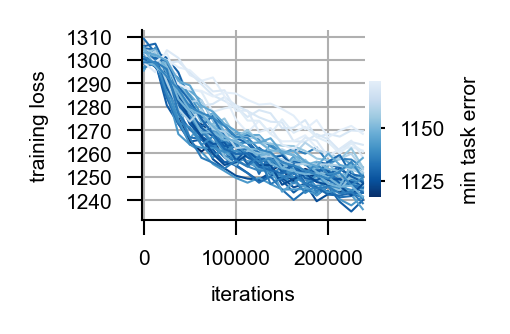

In [16]:
fig, ax = ensemble.training_loss()

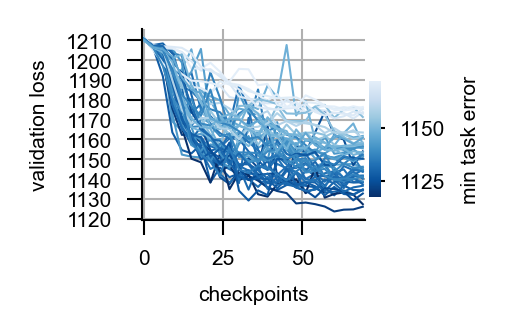

In [20]:
fig, ax = ensemble.validation_loss()

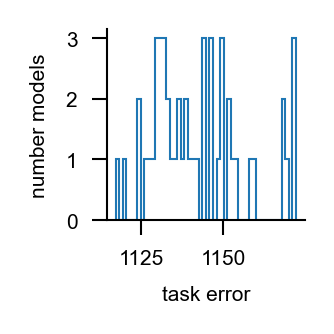

In [22]:
fig, ax = ensemble.task_error_histogram()

## Learned parameter marginals

[2024-09-22 03:37:54] ensemble:200 flow/9997/000 differs from flow/9997/001. Diff is ['≠network_name: flow/9997/000'].


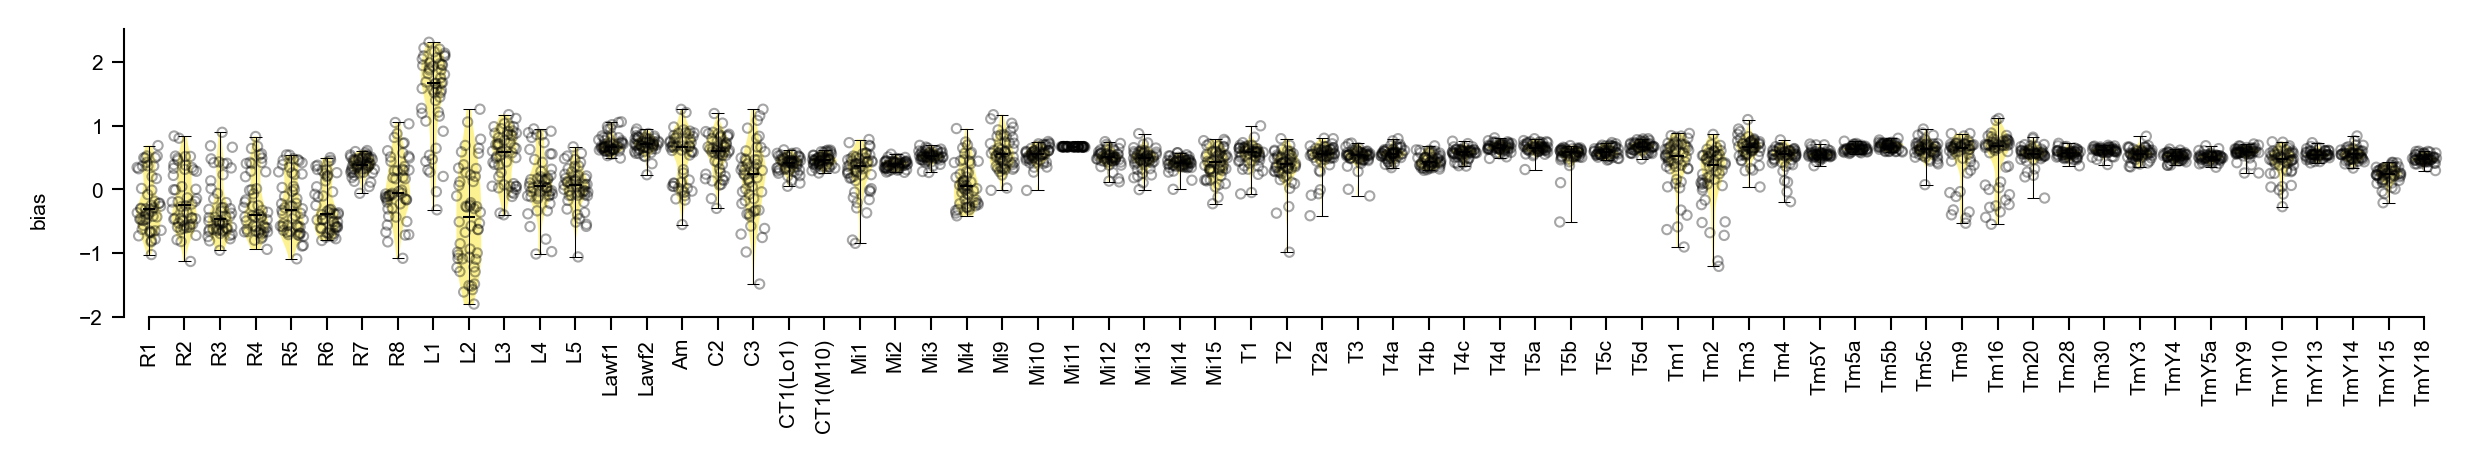

In [24]:
fig, axes = ensemble.node_parameters("bias")

[2024-09-22 03:38:32] ensemble:200 flow/9997/000 differs from flow/9997/001. Diff is ['≠network_name: flow/9997/000'].


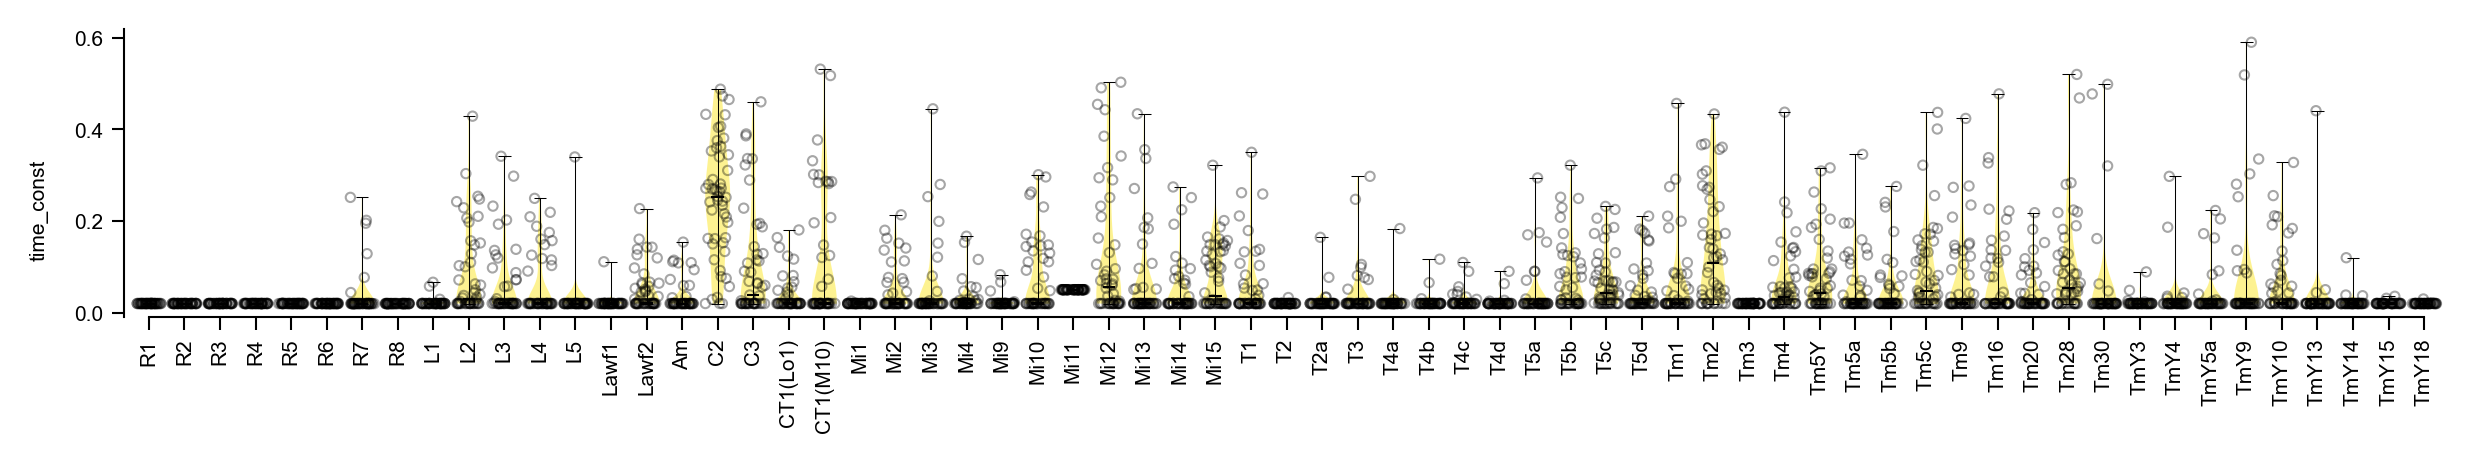

In [25]:
fig, axes = ensemble.node_parameters("time_const")

[2024-09-22 03:38:48] ensemble:200 flow/9997/000 differs from flow/9997/001. Diff is ['≠network_name: flow/9997/000'].


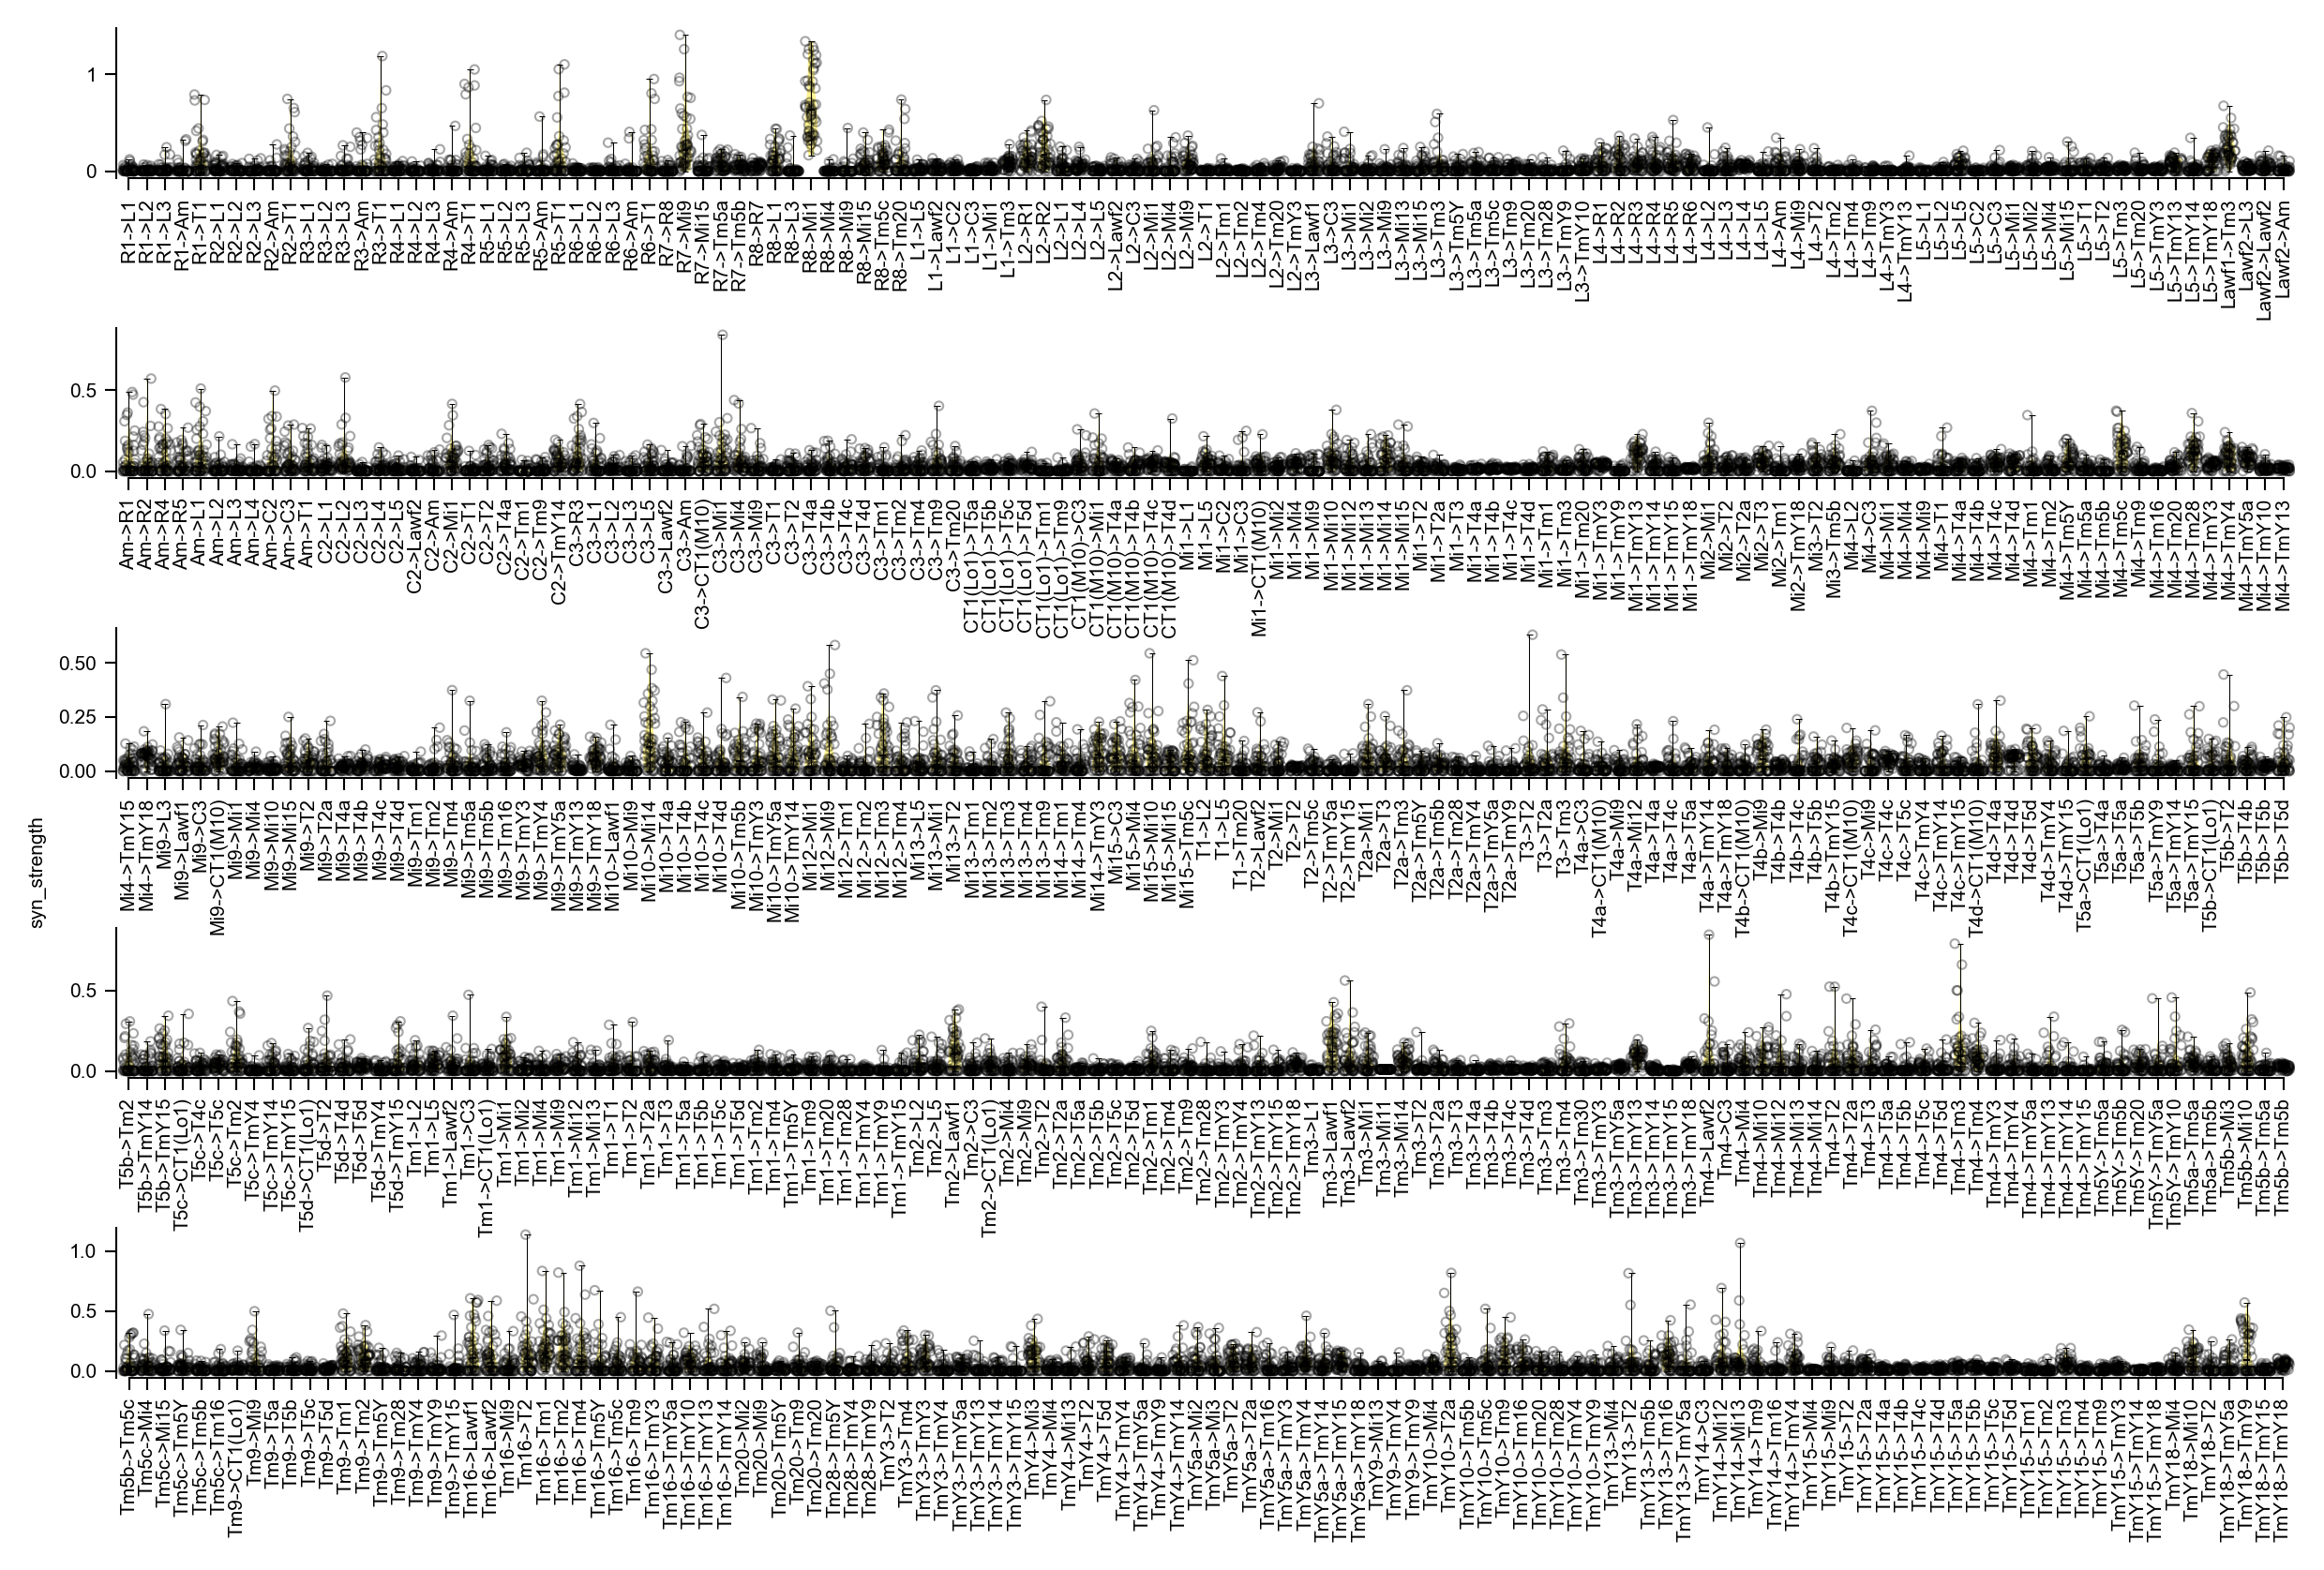

In [26]:
fig, axes = ensemble.edge_parameters("syn_strength")

## Dead or alive

In [28]:
fig, ax, cbar, matrix = ensemble.dead_or_alive()

[2024-09-22 03:39:49] network:251 Initialized network with NumberOfParams(free=734, fixed=2959) parameters.
[2024-09-22 03:39:49] chkpt_utils:72 Recovered network state.
[2024-09-22 03:39:55] network:748 Computing 2268 stimulus responses.


Batch:   0%|          | 0/567 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 24.00 MiB (GPU 0; 11.90 GiB total capacity; 3.29 GiB already allocated; 11.88 MiB free; 3.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

## Contrast selectivity and flash response indices (FRI)

#### 20% best task-performing models

In [29]:
with ensemble.ratio(best=0.2):
    ensemble.flash_response_index()

AttributeError: 'EnsembleView' object has no attribute 'flash_response_indices'

#### 100% models

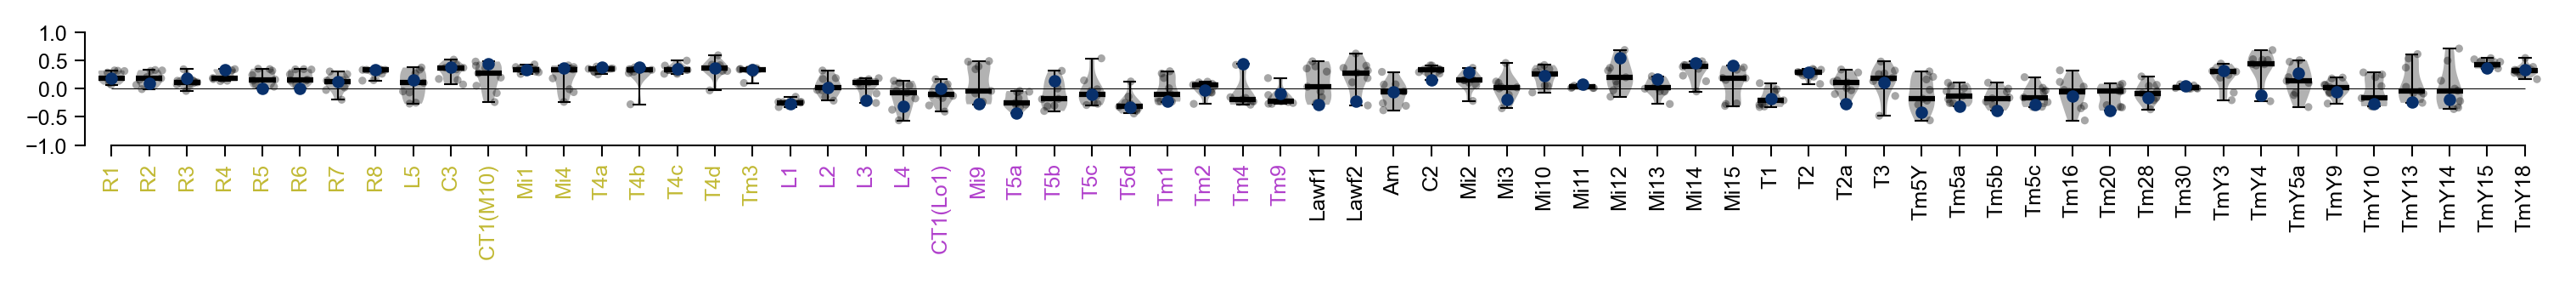

In [17]:
fig, ax = ensemble.flash_response_index()

## Motion selectivity and direction selectivity index (DSI)

#### 20% best task-performing models

[2024-09-12 19:52:03] Initialized network with NumberOfParams(free=734, fixed=2959) parameters.
[2024-09-12 19:52:03] Recovered network state.
[2024-09-12 19:52:03] Computing 144 stimulus responses.


Batch:   0%|          | 0/144 [00:00<?, ?it/s]

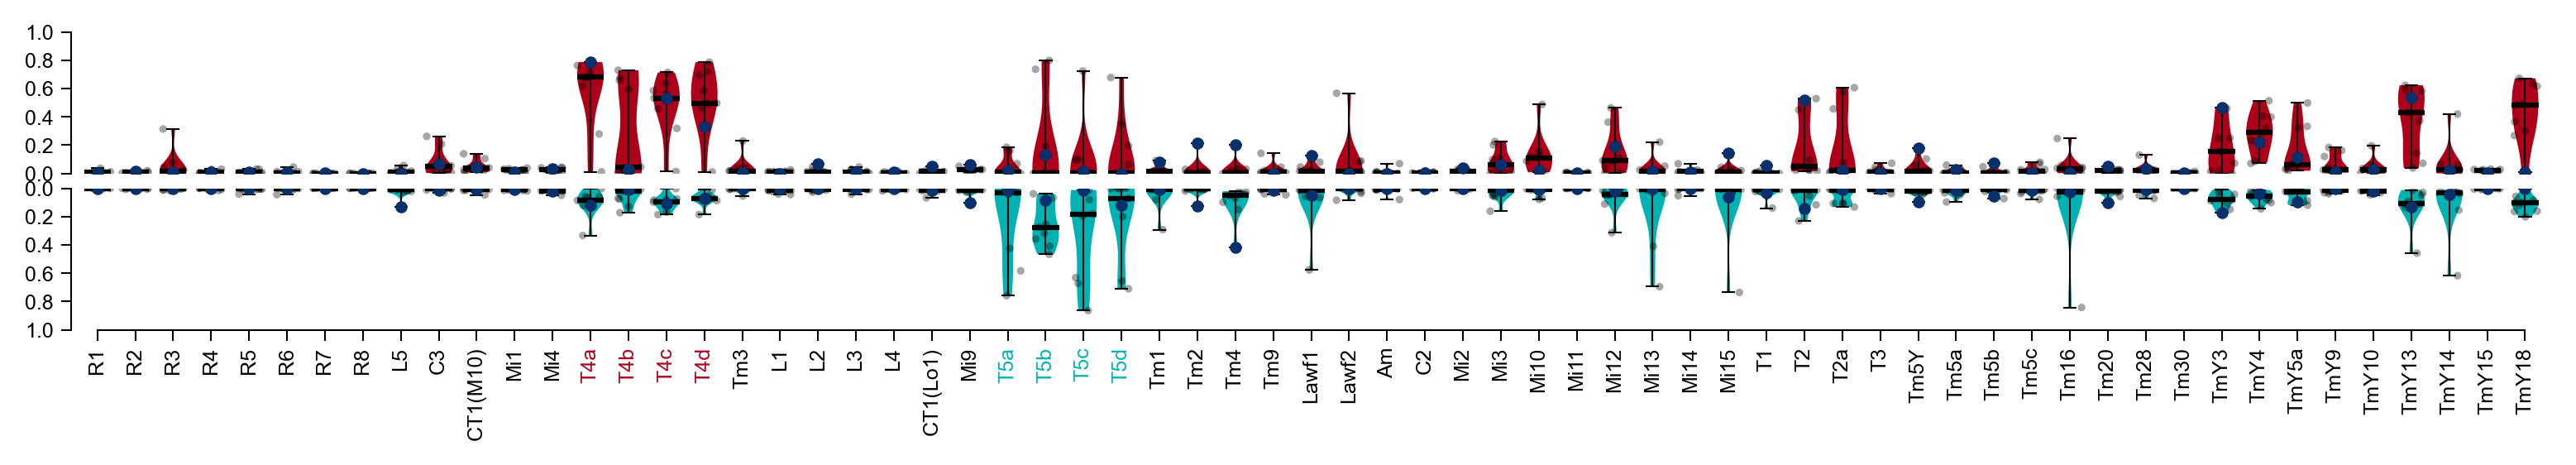

In [7]:
with ensemble.ratio(best=0.2):
    ensemble.direction_selectivity_index()

#### 100% models

[2024-09-12 17:36:56] Initialized network with NumberOfParams(free=734, fixed=2959) parameters.
[2024-09-12 17:36:56] Recovered network state.
[2024-09-12 17:36:56] Computing 144 stimulus responses.


Batch:   0%|          | 0/144 [00:00<?, ?it/s]

(<Figure size 3000x360 with 2 Axes>, (<Axes: >, <Axes: >))

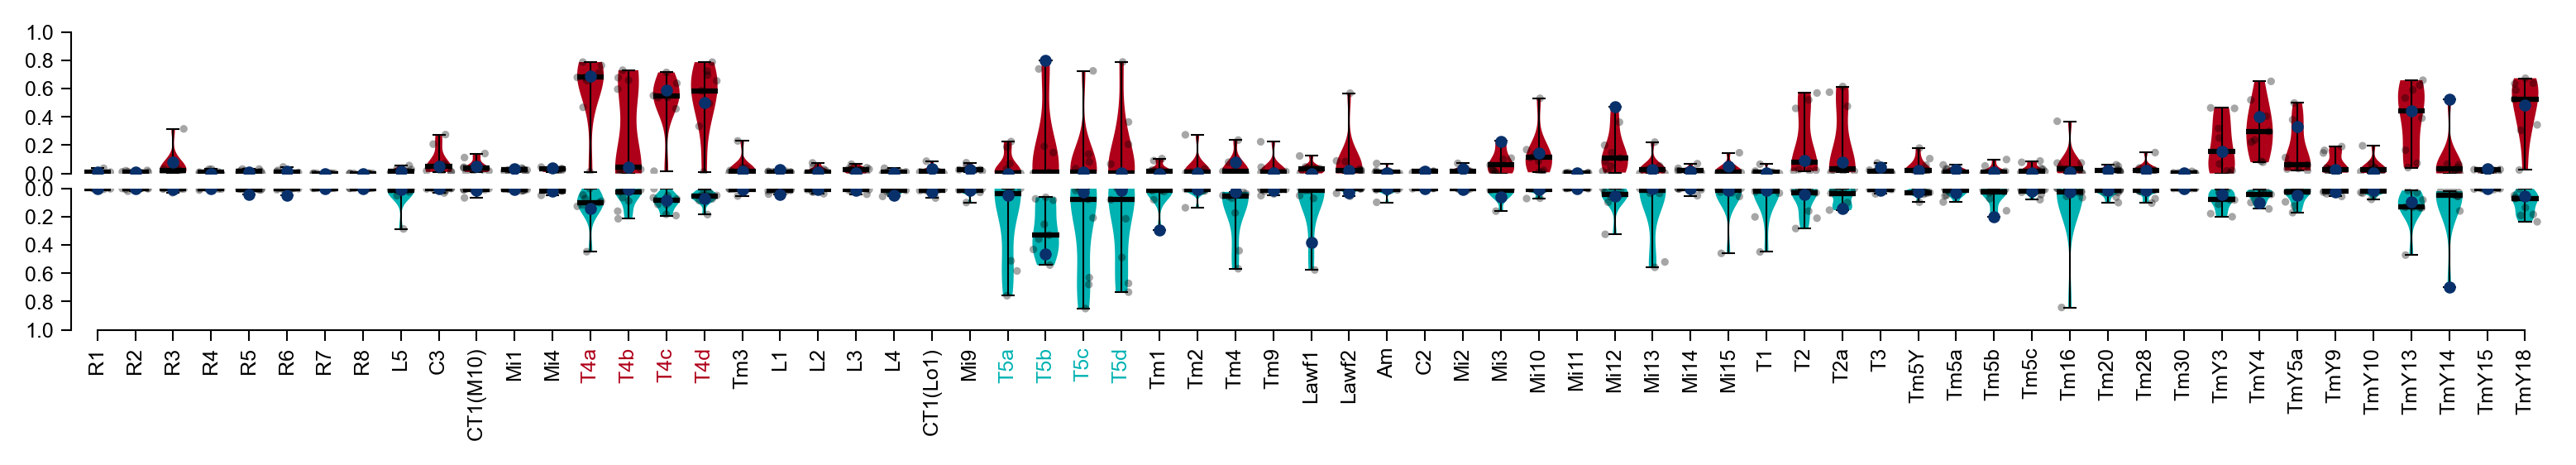

In [19]:
ensemble.direction_selectivity_index()

## Clustering of models based on responses to naturalistic stimuli

#### T4c

Zarr directory exists at /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/9997/000/__cache__/flyvision/analysis/stimulus_responses/compute_responses/1b552fa7f56e5cec50d6641a98ee2d8e/output.zarr
Zarr directory exists at /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/9997/001/__cache__/flyvision/analysis/stimulus_responses/compute_responses/d0139ba0ceb627d95ae2ed89c608c452/output.zarr
Zarr directory exists at /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/9997/002/__cache__/flyvision/analysis/stimulus_responses/compute_responses/bc864105f7852fad71c5942528674cfc/output.zarr
Zarr directory exists at /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/9997/003/__cache__/flyvision/analysis/stimulus_responses/compute_responses/d1e137617c4b8f648a86c81867c14965/output.zarr
Zarr directory exists at /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/9997/004/__cach

[2024-09-20 17:41:29] clustering:354 reshaped X from (50, 2268, 80) to (50, 181440)
/home/lappalainenj@hhmi.org/miniconda3/envs/flyvision/lib/python3.9/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


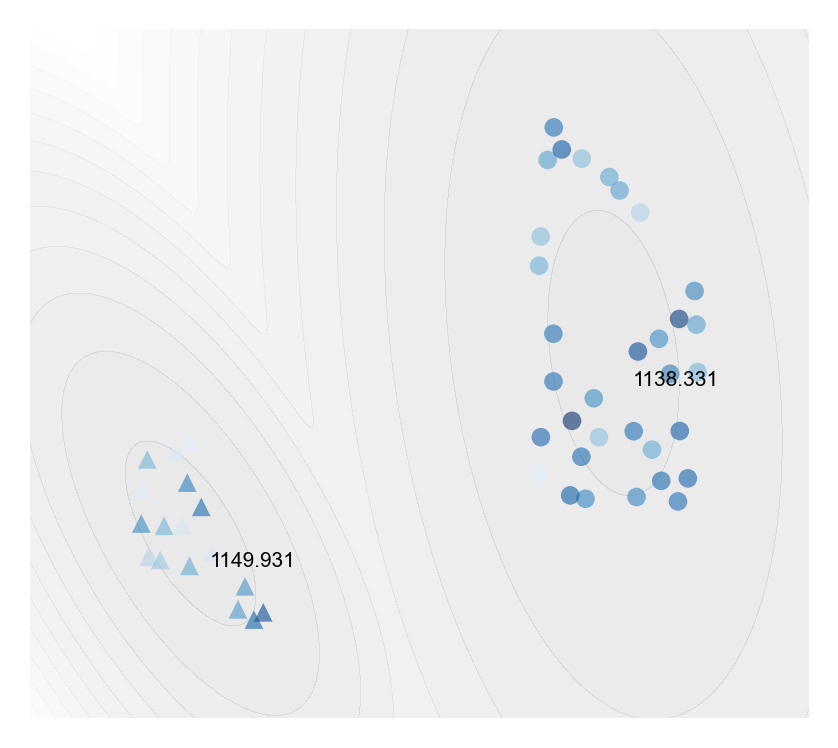

In [7]:
task_error = ensemble.task_error()
embeddingplot = ensemble.clustering("T4c").plot(task_error=task_error.values, colors=task_error.colors)

In [31]:
from flyvision.analysis.stimulus_responses import moving_edge_responses

In [34]:
r = moving_edge_responses(ensemble)

Zarr directory exists at /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/9997/000/__cache__/flyvision/analysis/stimulus_responses/compute_responses/464761a533709d265f092105e8d21011/output.zarr
Zarr directory exists at /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/9997/001/__cache__/flyvision/analysis/stimulus_responses/compute_responses/dff91885aa6fb9e42c09ce871033a713/output.zarr
Zarr directory exists at /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/9997/002/__cache__/flyvision/analysis/stimulus_responses/compute_responses/cbeb51120fdf88a5d20d959dda4546fe/output.zarr
Zarr directory exists at /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/9997/003/__cache__/flyvision/analysis/stimulus_responses/compute_responses/602cfd664966461ce6853d7ef7db3dd4/output.zarr
Zarr directory exists at /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/9997/004/__cach

Zarr directory exists at /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/9997/026/__cache__/flyvision/analysis/stimulus_responses/compute_responses/0a0137da798943ab7c3a435ed4fd5735/output.zarr
Zarr directory exists at /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/9997/027/__cache__/flyvision/analysis/stimulus_responses/compute_responses/846ad8741bf64fb9f8b1ddc735a40737/output.zarr
Zarr directory exists at /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/9997/028/__cache__/flyvision/analysis/stimulus_responses/compute_responses/a18f2cfec270b2a0bce164012733fc75/output.zarr
Zarr directory exists at /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/9997/029/__cache__/flyvision/analysis/stimulus_responses/compute_responses/941e67ce5c578cd3d086980fc8c2c9d8/output.zarr
Zarr directory exists at /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/9997/030/__cach

In [22]:
from flyvision.analysis.moving_bar_responses import plot_angular_tuning, peak_responses, peak_responses_angular

(<Figure size 300x300 with 1 Axes>, <PolarAxes: >)

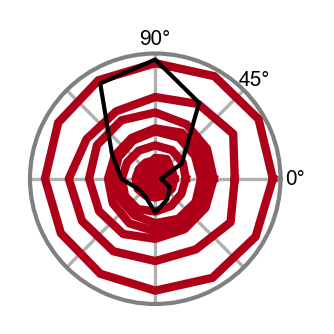

In [38]:
plot_angular_tuning(r, 'T4c', intensity=1)

In [41]:
cluster_indices = ensemble.cluster_indices("T4c")

Zarr directory exists at /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/9997/000/__cache__/flyvision/analysis/stimulus_responses/compute_responses/1b552fa7f56e5cec50d6641a98ee2d8e/output.zarr
Zarr directory exists at /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/9997/001/__cache__/flyvision/analysis/stimulus_responses/compute_responses/d0139ba0ceb627d95ae2ed89c608c452/output.zarr
Zarr directory exists at /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/9997/002/__cache__/flyvision/analysis/stimulus_responses/compute_responses/bc864105f7852fad71c5942528674cfc/output.zarr
Zarr directory exists at /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/9997/003/__cache__/flyvision/analysis/stimulus_responses/compute_responses/d1e137617c4b8f648a86c81867c14965/output.zarr
Zarr directory exists at /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/9997/004/__cach

[2024-09-20 18:24:23] clustering:354 reshaped X from (50, 2268, 80) to (50, 181440)
/home/lappalainenj@hhmi.org/miniconda3/envs/flyvision/lib/python3.9/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


In [45]:
colors = ensemble.task_error().colors

In [50]:
plot_angular_tuning(r.sel(network_id=cluster_indices[0]),
                    'T4c', intensity=1,
                    colors=colors[cluster_indices[0]])

[autoreload of numpy.matrixlib failed: Traceback (most recent call last):
  File "/home/lappalainenj@hhmi.org/miniconda3/envs/flyvision/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/lappalainenj@hhmi.org/miniconda3/envs/flyvision/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/home/lappalainenj@hhmi.org/miniconda3/envs/flyvision/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/home/lappalainenj@hhmi.org/miniconda3/envs/flyvision/lib/python3.9/site-packages/numpy/matrixlib/__init__.py", line 6, in <module>
    __all__ = defmatrix.__all__
NameError: name 'def

TypeError: int() argument must be a string, a bytes-like object or a number, not '_NoValueType'

In [ ]:
%%prun
r = 

In [ ]:
plot_angular_tuning(r.sel(network_id=cluster_indices[1]),
                    'T4c', intensity=1)

In [9]:
cluster_indices = ensemble.cluster_indices("T4c")

[2024-09-13 06:38:44] Loaded T4c embedding and clustering from /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/9998/umap_and_clustering.


In [10]:
import numpy as np
import matplotlib.pyplot as plt

from flyvision.analysis.clustering import check_markers
from flyvision.utils.activity_utils import CellTypeArray
from flyvision.plots import plt_utils 
from flyvision.plots import plots
from flyvision.datasets import MovingEdge
from flyvision.analysis.moving_bar_responses import MovingEdgeResponseView
from flyvision.utils.groundtruth_utils import tuning_curves

In [11]:
cluster_indices = ensemble.cluster_indices("T4c")

[2024-09-13 06:38:44] Loaded T4c embedding and clustering from /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/9998/umap_and_clustering.


In [12]:
dataset = MovingEdge(
                offsets=[-10, 11],
                intensities=[0, 1],
                speeds=[2.4, 4.8, 9.7, 13, 19, 25],
                height=80,
                post_pad_mode="continue",
                t_pre=1.0,
                t_post=1.0,
                dt=1 / 200,
                angles=list(np.arange(0, 360, 30)),
            )
responses = ensemble.stored_responses("movingedge_responses")

In [13]:
responses_cta = CellTypeArray(
    responses,
    connectome=ensemble.connectome,
)

In [14]:
response_view = MovingEdgeResponseView(
    arg_df=dataset.arg_df,
    responses=responses_cta,
    config=dataset.config,
    stim_sample_dim=1,
    temporal_dim=2,
)

In [15]:
cluster_colors = {}
CMAPS = ["Greens_r", "Reds_r", "Reds_r"]

for cluster_id in cluster_indices:
    cluster_colors[cluster_id] = ensemble.task_error(cmap=CMAPS[cluster_id]).colors

In [16]:
task_error_sorting = np.argsort(ensemble.task_error().values)

In [17]:
measured_tuning = np.array(tuning_curves["T4c"])
theta = np.linspace(0, 360, len(measured_tuning), endpoint=True)

In [18]:
task_error = ensemble.task_error()

In [20]:
peak_responses = response_view.peak_responses()

In [27]:
peak_responses

MovingEdgeResponseView(     angle  width  intensity    t_stim  speed
0        0     80          0  3.394397    2.4
1        0     80          0  1.697198    4.8
2        0     80          0  0.839851    9.7
3        0     80          0  0.626658   13.0
4        0     80          0  0.428766   19.0
..     ...    ...        ...       ...    ...
139    330     80          1  1.697198    4.8
140    330     80          1  0.839851    9.7
141    330     80          1  0.626658   13.0
142    330     80          1  0.428766   19.0
143    330     80          1  0.325862   25.0

[144 rows x 5 columns], {'R1': 'Array((12, 49, 1, 2, 6, 1, 65))', 'R2': 'Array((12, 49, 1, 2, 6, 1, 65))', 'R3': 'Array((12, 49, 1, 2, 6, 1, 65))', 'R4': 'Array((12, 49, 1, 2, 6, 1, 65))', 'R5': 'Array((12, 49, 1, 2, 6, 1, 65))', 'R6': 'Array((12, 49, 1, 2, 6, 1, 65))', 'R7': 'Array((12, 49, 1, 2, 6, 1, 65))', 'R8': 'Array((12, 49, 1, 2, 6, 1, 65))', 'L1': 'Array((12, 49, 1, 2, 6, 1, 65))', 'L2': 'Array((12, 49, 1, 2, 6,

(<Figure size 600x300 with 4 Axes>, <PolarAxes: >)

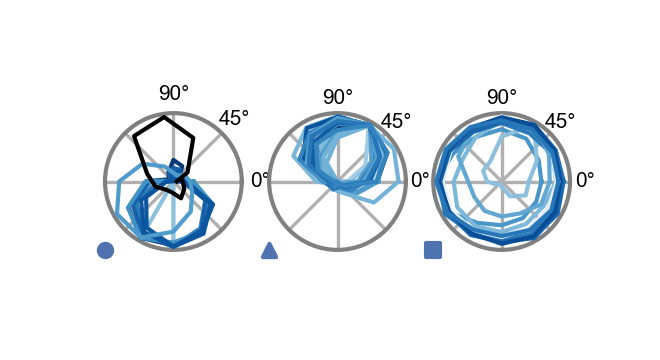

In [28]:
fig, axes = plt.subplots(1, len(cluster_indices), subplot_kw={'projection': 'polar'},
                         figsize=[2, 1])
for cluster_id, model_ids in cluster_indices.items():
    ax = axes[cluster_id]
    response_view[model_ids, :, :].plot_angular_tuning(
        cell_type="T4c",
        intensity=1,
        colors=task_error.colors[model_ids],
        fig=fig,
        ax=ax,
        zorder=task_error_sorting[model_ids][::-1],
        peak_responses = peak_responses[:, model_ids],
        average_models=False
    )


n_clusters = len(cluster_indices)

axes = np.atleast_2d(axes)
MARKERS = check_markers(n_clusters)
for column in range(axes.shape[1]):
    marker = MARKERS[column]
    plt_utils.add_cluster_marker(
        fig, axes[-1, column], marker=marker, color="#4F73AE", marker_size=10,
    )

plots.polar(
    theta,
    measured_tuning / measured_tuning.max(),
    fig=fig,
    ax=axes[0, 0],
    color="k",
    linewidth=1,
    fontsize=5,
    anglepad=-6,
)